In [1]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding

# machine learning
import sklearn                       # for data prep and classical ML

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")

# misc
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [2]:
# Load Dataset

file_path = "/Users/Sebastiano/data/Clinical_MRI.xlsx"
db = pd.read_excel(file_path)
pd.set_option('display.max_columns', None)

print("N° of patients: {}".format(len(db)))
print("N° of columns: {}".format(db.shape[1]))
db.head()

N° of patients: 27
N° of columns: 969


,Patient,Date of Birth,Gender,Education,Disease duration (months),Age,SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro-SSA,Anti-La-SSB,Anti-RNP,anti-Sm,C3 (mgdl),C4 (mgdl),aPL syndrome,LAC,aCL IgG,aCL IgM,aB2GPI IgG,aB2GPI IgM,aPL+,No Treatment,Antiplatelet,Anticoagulant,Prednisone (mg equivalent),Antimalarial,Immunosuppressant,Biologic,AnAb,Anti-Rib-P,Anti-DWEYS,NP-SLE,Event,Livedo reticularis,Cutaneous vasculitis,Hypertension,Hyperlipidaemia,current Smoking,ever smoking,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,Normal Appearing White Matter volume cm3,Normal Appearing White Matter volume %,Abnormal Appearing White Matter volume cm3,Abnormal Appearing White Matter volume %,Grey Matter (GM) volume cm3,Grey Matter (GM) volume %,Subcortical Grey Matter volume cm3,Subcortical Grey Matter volume %,Cortical Grey Matter volume cm3,Cortical Grey Matter volume %,Cerebellar Grey Matter volume cm3,Cerebellar Grey Matter volume %,Cerebro Spinal Fluid (CSF) volume cm3,Cerebro Spinal Fluid (CSF) volume %,Brain (WM+GM) volume cm3,Brain (WM+GM) volume %,Intracranial Cavity (IC) volume cm3,Intracranial Cavity (IC) volume %,Cerebrum total volume cm3,Cerebrum total volume %,Cerebrum right volume cm3,Cerebrum right volume %,Cerebrum left volume cm3,Cerebrum left volume %,Cerebrum volume asymmetry,Cerebrum WM total volume cm3,Cerebrum WM total volume %,Cerebrum WM right volume cm3,Cerebrum WM right volume %,Cerebrum WM left volume cm3,Cerebrum WM left volume %,Cerebrum WM volume asymmetry,Cerebrum GM total volume cm3,Cerebrum GM total volume %,Cerebrum GM right volume cm3,Cerebrum GM right volume %,Cerebrum GM left volume cm3,Cerebrum GM left volume %,Cerebrum GM volume asymmetry,Cerebellum total volume cm3,Cerebellum total volume %,Cerebellum right volume cm3,Cerebellum right volume %,Cerebellum left volume cm3,Cerebellum left volume %,Cerebellum volume asymmetry,Cerebellum WM total volume cm3,Cerebellum WM total volume %,Cerebellum WM right volume cm3,Cerebellum WM right volume %,Cerebellum WM left volume cm3,Cerebellum WM left volume %,Cerebellum WM volume asymmetry,Cerebellum GM total volume cm3,Cerebellum GM total volume %,Cerebellum GM right volume cm3,Cerebellum GM right volume %,Cerebellum GM left volume cm3,Cerebellum GM left volume %,Cerebellum GM volume asymmetry,Vermis volume cm3,Vermis volume %,Brainstem volume cm3,Brainstem volume %,Accumbens total volume cm3,Accumbens total volume %,Accumbens right volume cm3,Accumbens right volume %,Accumbens left volume cm3,Accumbens left volume %,Accumbens volume asymmetry,Amygdala total volume cm3,Amygdala total volume %,Amygdala right volume cm3,Amygdala right volume %,Amygdala left volume cm3,Amygdala left volume %,Amygdala volume asymmetry,Basal Forebrain total volume cm3,Basal Forebrain total volume %,Basal Forebrain right volume cm3,Basal Forebrain right volume %,Basal Forebrain left volume cm3,Basal Forebrain left volume %,Basal Forebrain volume asymmetry,Caudate total volume cm3,Caudate total volume %,Caudate right volume cm3,Caudate right volume %,Caudate left volume cm3,Caudate left volume %,Caudate volume asymmetry,Hippocampus total volume cm3,Hippocampus total volume %,Hippocampus right volume cm3,Hippocampus right volume %,Hippocampus left volume cm3,Hippocampus left volume %,Hippocampus volume asymmetry,Pallidum total volume cm3,Pallidum total volume %,Pallidum right volume cm3,Pallidum right volume %,Pallidum left volume cm3,Pallidum left volume %,Pallidum volume asymmetry,Putamen total volume cm3,Putamen total volume %,Putamen right volume cm3,Putamen right volume %,Putamen left volume cm3,Putamen left volume %,Putamen volume asymmetry,Thalamus total volume cm3,Thalamus total volume %,Thalamus right volume cm3,Thalamus right volume %,Thalamus left volume cm3,Thalamus left volume %,Thalamus volume asymmetry,Ventral DC

In [3]:
# Drop unwanted columns

df = db.drop(['Patient','Date of Birth', 'Education'], axis = 'columns')
# drop columns that include "%" in their name
#cols_to_drop = [col for col in df.columns if "%" in col]
#df = df.drop(columns=cols_to_drop)
print("Effective features to consider: {} ".format(len(df.columns)-1))

Effective features to consider: 965 


In [4]:
# One Hot Encoding for Scores, Antiplatelets and Coagulants, Therapy, NP Event

from sklearn.preprocessing import OneHotEncoder

categ = ['Antiplatelet', 'Anticoagulant', 'Antimalarial', 'Immunosuppressant', 'Biologic', 'Event']
ohe = OneHotEncoder(categories='auto',sparse=False)
df_enc = ohe.fit_transform(df[categ])
df_enc = pd.DataFrame(df_enc,columns=ohe.get_feature_names_out(categ))
df = pd.concat([df, df_enc], axis=1)
df = df.drop(categ, axis=1)
df.tail()

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender,Disease duration (months),Age,SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro-SSA,Anti-La-SSB,Anti-RNP,anti-Sm,C3 (mgdl),C4 (mgdl),aPL syndrome,LAC,aCL IgG,aCL IgM,aB2GPI IgG,aB2GPI IgM,aPL+,No Treatment,Prednisone (mg equivalent),AnAb,Anti-Rib-P,Anti-DWEYS,NP-SLE,Livedo reticularis,Cutaneous vasculitis,Hypertension,Hyperlipidaemia,current Smoking,ever smoking,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,Normal Appearing White Matter volume cm3,Normal Appearing White Matter volume %,Abnormal Appearing White Matter volume cm3,Abnormal Appearing White Matter volume %,Grey Matter (GM) volume cm3,Grey Matter (GM) volume %,Subcortical Grey Matter volume cm3,Subcortical Grey Matter volume %,Cortical Grey Matter volume cm3,Cortical Grey Matter volume %,Cerebellar Grey Matter volume cm3,Cerebellar Grey Matter volume %,Cerebro Spinal Fluid (CSF) volume cm3,Cerebro Spinal Fluid (CSF) volume %,Brain (WM+GM) volume cm3,Brain (WM+GM) volume %,Intracranial Cavity (IC) volume cm3,Intracranial Cavity (IC) volume %,Cerebrum total volume cm3,Cerebrum total volume %,Cerebrum right volume cm3,Cerebrum right volume %,Cerebrum left volume cm3,Cerebrum left volume %,Cerebrum volume asymmetry,Cerebrum WM total volume cm3,Cerebrum WM total volume %,Cerebrum WM right volume cm3,Cerebrum WM right volume %,Cerebrum WM left volume cm3,Cerebrum WM left volume %,Cerebrum WM volume asymmetry,Cerebrum GM total volume cm3,Cerebrum GM total volume %,Cerebrum GM right volume cm3,Cerebrum GM right volume %,Cerebrum GM left volume cm3,Cerebrum GM left volume %,Cerebrum GM volume asymmetry,Cerebellum total volume cm3,Cerebellum total volume %,Cerebellum right volume cm3,Cerebellum right volume %,Cerebellum left volume cm3,Cerebellum left volume %,Cerebellum volume asymmetry,Cerebellum WM total volume cm3,Cerebellum WM total volume %,Cerebellum WM right volume cm3,Cerebellum WM right volume %,Cerebellum WM left volume cm3,Cerebellum WM left volume %,Cerebellum WM volume asymmetry,Cerebellum GM total volume cm3,Cerebellum GM total volume %,Cerebellum GM right volume cm3,Cerebellum GM right volume %,Cerebellum GM left volume cm3,Cerebellum GM left volume %,Cerebellum GM volume asymmetry,Vermis volume cm3,Vermis volume %,Brainstem volume cm3,Brainstem volume %,Accumbens total volume cm3,Accumbens total volume %,Accumbens right volume cm3,Accumbens right volume %,Accumbens left volume cm3,Accumbens left volume %,Accumbens volume asymmetry,Amygdala total volume cm3,Amygdala total volume %,Amygdala right volume cm3,Amygdala right volume %,Amygdala left volume cm3,Amygdala left volume %,Amygdala volume asymmetry,Basal Forebrain total volume cm3,Basal Forebrain total volume %,Basal Forebrain right volume cm3,Basal Forebrain right volume %,Basal Forebrain left volume cm3,Basal Forebrain left volume %,Basal Forebrain volume asymmetry,Caudate total volume cm3,Caudate total volume %,Caudate right volume cm3,Caudate right volume %,Caudate left volume cm3,Caudate left volume %,Caudate volume asymmetry,Hippocampus total volume cm3,Hippocampus total volume %,Hippocampus right volume cm3,Hippocampus right volume %,Hippocampus left volume cm3,Hippocampus left volume %,Hippocampus volume asymmetry,Pallidum total volume cm3,Pallidum total volume %,Pallidum right volume cm3,Pallidum right volume %,Pallidum left volume cm3,Pallidum left volume %,Pallidum volume asymmetry,Putamen total volume cm3,Putamen total volume %,Putamen right volume cm3,Putamen right volume %,Putamen left volume cm3,Putamen left volume %,Putamen volume asymmetry,Thalamus total volume cm3,Thalamus total volume %,Thalamus right volume cm3,Thalamus right volume %,Thalamus left volume cm3,Thalamus left volume %,Thalamus volume asymmetry,Ventral DC total volume cm3,Ventral DC total volume %,Ventral DC right volume cm3,Ventral DC right volume %,Ventral

# Partial Correlations

## NP-SLE

In [5]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']

# Define the list of MRI columns
mri_columns = [
    'Abnormal Appearing White Matter volume cm3',
    'Abnormal Appearing White Matter volume %',
    'Cerebellar Grey Matter volume cm3',
    'Cerebellar Grey Matter volume %',
    'Cerebrum WM volume asymmetry'
]

prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
age = 'Age'
sex = 'Gender'

# Compute and print correlations between NP-SLE and MRI columns
for mri_col in mri_columns:
    r, p = spearmanr(df['NP-SLE'], df[mri_col])
    if p < 0.05:  # Check if the p-value is less than 0.05
        print(f'NP-SLE vs {mri_col}: r = {r:.2f}, p = {p:.5f}')


In [5]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']

# Define the list of MRI columns
mri_columns = [
    'SCA thickness asymmetry',
    'Amygdala right volume %',
    'Temporal thickness asymmetry',
    'TMP thickness asymmetry',
    'MTG thickness asymmetry'
]

prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
age = 'Age'
sex = 'Gender'

# Compute and print correlations between NP-SLE and MRI columns
for mri_col in mri_columns:
    r, p = spearmanr(df['NP-SLE'], df[mri_col])
    if p < 0.05:  # Check if the p-value is less than 0.05
        print(f'NP-SLE vs {mri_col}: r = {r:.2f}, p = {p:.5f}')

# Compute and print partial correlations between NP-SLE and neurocognitive columns adjusting for continuous covariates
for col in neurocog_cols:
    partial_corr_results = pg.partial_corr(data=df, x=col, y='NP-SLE', covar=[prednisone, sledai, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    if p_partial < 0.05:  # Check if the partial p-value is less than 0.05
        print(f'{col} vs NP-SLE (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')


NP-SLE vs SCA thickness asymmetry: r = 0.52, p = 0.00508
NP-SLE vs Amygdala right volume %: r = 0.41, p = 0.03404
NP-SLE vs Temporal thickness asymmetry: r = 0.40, p = 0.03886
NP-SLE vs TMP thickness asymmetry: r = 0.50, p = 0.00730
NP-SLE vs MTG thickness asymmetry: r = 0.41, p = 0.03404
Event_Mood abnormalities (depressive) vs NP-SLE (partial corr): r = 0.44, p = 0.03427
Event_Seizure vs NP-SLE (partial corr): r = 0.43, p = 0.03994


In [31]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df['NP-SLE'])
print(f'{lesion_load} vs NP-SLE: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y='NP-SLE', covar=[prednisone, sledai, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs NP-SLE (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

SCA thickness asymmetry vs NP-SLE: r = 0.52, p = 0.00508
SCA thickness asymmetry vs NP-SLE (partial corr): r = 0.45, p = 0.02957


In [28]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SCA thickness asymmetry: r = 0.33, p = 0.09559
Event_CVA vs SCA thickness asymmetry (partial corr): r = 0.71, p = 0.00014
Event_Mood abnormalities (depressive) vs SCA thickness asymmetry: r = 0.01, p = 0.95168
Event_Mood abnormalities (depressive) vs SCA thickness asymmetry (partial corr): r = -0.08, p = 0.72381
Event_Mood abnormalities (mixed) vs SCA thickness asymmetry: r = 0.13, p = 0.53150
Event_Mood abnormalities (mixed) vs SCA thickness asymmetry (partial corr): r = -0.01, p = 0.96272
Event_Movement Disorder vs SCA thickness asymmetry: r = 0.23, p = 0.25568
Event_Movement Disorder vs SCA thickness asymmetry (partial corr): r = 0.03, p = 0.90420
Event_Psychosis vs SCA thickness asymmetry: r = 0.34, p = 0.07802
Event_Psychosis vs SCA thickness asymmetry (partial corr): r = 0.31, p = 0.14360
Event_Seizure vs SCA thickness asymmetry: r = -0.05, p = 0.82212
Event_Seizure vs SCA thickness asymmetry (partial corr): r = 0.03, p = 0.88806
Event_Seizure, ACS, myelitis, CVA vs 

In [32]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala right volume %'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df['NP-SLE'])
print(f'{lesion_load} vs NP-SLE: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y='NP-SLE', covar=[prednisone, sledai, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs NP-SLE (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

Amygdala right volume % vs NP-SLE: r = 0.41, p = 0.03404
Amygdala right volume % vs NP-SLE (partial corr): r = 0.43, p = 0.04282


In [33]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala right volume %'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Amygdala right volume %: r = 0.05, p = 0.80302
Event_CVA vs Amygdala right volume % (partial corr): r = 0.06, p = 0.78390
Event_Mood abnormalities (depressive) vs Amygdala right volume %: r = 0.27, p = 0.17433
Event_Mood abnormalities (depressive) vs Amygdala right volume % (partial corr): r = 0.25, p = 0.24095
Event_Mood abnormalities (mixed) vs Amygdala right volume %: r = 0.28, p = 0.16193
Event_Mood abnormalities (mixed) vs Amygdala right volume % (partial corr): r = 0.19, p = 0.37541
Event_Movement Disorder vs Amygdala right volume %: r = 0.30, p = 0.12558
Event_Movement Disorder vs Amygdala right volume % (partial corr): r = 0.18, p = 0.42317
Event_Psychosis vs Amygdala right volume %: r = -0.13, p = 0.52756
Event_Psychosis vs Amygdala right volume % (partial corr): r = -0.11, p = 0.60740
Event_Seizure vs Amygdala right volume %: r = -0.05, p = 0.82212
Event_Seizure vs Amygdala right volume % (partial corr): r = 0.14, p = 0.53628
Event_Seizure, ACS, myelitis, CVA vs 

In [34]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df['NP-SLE'])
print(f'{lesion_load} vs NP-SLE: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y='NP-SLE', covar=[prednisone, sledai, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs NP-SLE (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

Temporal thickness asymmetry vs NP-SLE: r = 0.40, p = 0.03886
Temporal thickness asymmetry vs NP-SLE (partial corr): r = 0.47, p = 0.02452


In [35]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Temporal thickness asymmetry: r = 0.28, p = 0.16193
Event_CVA vs Temporal thickness asymmetry (partial corr): r = 0.38, p = 0.07704
Event_Mood abnormalities (depressive) vs Temporal thickness asymmetry: r = 0.16, p = 0.42787
Event_Mood abnormalities (depressive) vs Temporal thickness asymmetry (partial corr): r = 0.00, p = 0.99086
Event_Mood abnormalities (mixed) vs Temporal thickness asymmetry: r = -0.18, p = 0.37918
Event_Mood abnormalities (mixed) vs Temporal thickness asymmetry (partial corr): r = -0.06, p = 0.76916
Event_Movement Disorder vs Temporal thickness asymmetry: r = 0.25, p = 0.20517
Event_Movement Disorder vs Temporal thickness asymmetry (partial corr): r = 0.38, p = 0.07722
Event_Psychosis vs Temporal thickness asymmetry: r = -0.16, p = 0.41540
Event_Psychosis vs Temporal thickness asymmetry (partial corr): r = -0.19, p = 0.37791
Event_Seizure vs Temporal thickness asymmetry: r = 0.18, p = 0.36474
Event_Seizure vs Temporal thickness asymmetry (partial corr)

In [36]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'TMP thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df['NP-SLE'])
print(f'{lesion_load} vs NP-SLE: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y='NP-SLE', covar=[prednisone, sledai, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs NP-SLE (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

TMP thickness asymmetry vs NP-SLE: r = 0.50, p = 0.00730
TMP thickness asymmetry vs NP-SLE (partial corr): r = 0.52, p = 0.01122


In [39]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'TMP thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs TMP thickness asymmetry: r = 0.30, p = 0.12558
Event_CVA vs TMP thickness asymmetry (partial corr): r = 0.69, p = 0.00023
Event_Mood abnormalities (depressive) vs TMP thickness asymmetry: r = 0.29, p = 0.13691
Event_Mood abnormalities (depressive) vs TMP thickness asymmetry (partial corr): r = 0.02, p = 0.94491
Event_Mood abnormalities (mixed) vs TMP thickness asymmetry: r = -0.08, p = 0.70806
Event_Mood abnormalities (mixed) vs TMP thickness asymmetry (partial corr): r = 0.02, p = 0.94514
Event_Movement Disorder vs TMP thickness asymmetry: r = -0.15, p = 0.45194
Event_Movement Disorder vs TMP thickness asymmetry (partial corr): r = 0.27, p = 0.22148
Event_Psychosis vs TMP thickness asymmetry: r = -0.02, p = 0.92838
Event_Psychosis vs TMP thickness asymmetry (partial corr): r = -0.13, p = 0.56020
Event_Seizure vs TMP thickness asymmetry: r = 0.21, p = 0.28882
Event_Seizure vs TMP thickness asymmetry (partial corr): r = 0.08, p = 0.72675
Event_Seizure, ACS, myelitis, CVA vs

In [41]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MTG thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df['NP-SLE'])
print(f'{lesion_load} vs NP-SLE: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y='NP-SLE', covar=[prednisone, sledai, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs NP-SLE (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

MTG thickness asymmetry vs NP-SLE: r = 0.41, p = 0.03404
MTG thickness asymmetry vs NP-SLE (partial corr): r = 0.43, p = 0.03923


## SLEDAI

Event_CVA vs SLEDAI-2k (at the time of NP event): r = -0.16477, p = 0.41147
Event_CVA vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.16657, p = 0.44748
Event_Mood abnormalities (depressive) vs SLEDAI-2k (at the time of NP event): r = 0.16022, p = 0.42470
Event_Mood abnormalities (depressive) vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.00745, p = 0.97310
Event_Mood abnormalities (mixed) vs SLEDAI-2k (at the time of NP event): r = 0.21547, p = 0.28041
Event_Mood abnormalities (mixed) vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.10704, p = 0.62688
Event_Movement Disorder vs SLEDAI-2k (at the time of NP event): r = 0.12675, p = 0.52870
Event_Movement Disorder vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.46616, p = 0.02496
Event_Psychosis vs SLEDAI-2k (at the time of NP event): r = 0.17366, p = 0.38634
Event_Psychosis vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.12258, p = 0.57739
Event_Seizure vs SLEDAI-2k (a

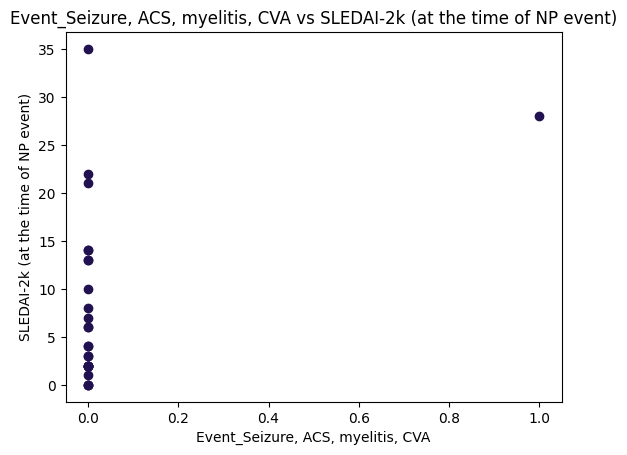

<Figure size 640x480 with 0 Axes>

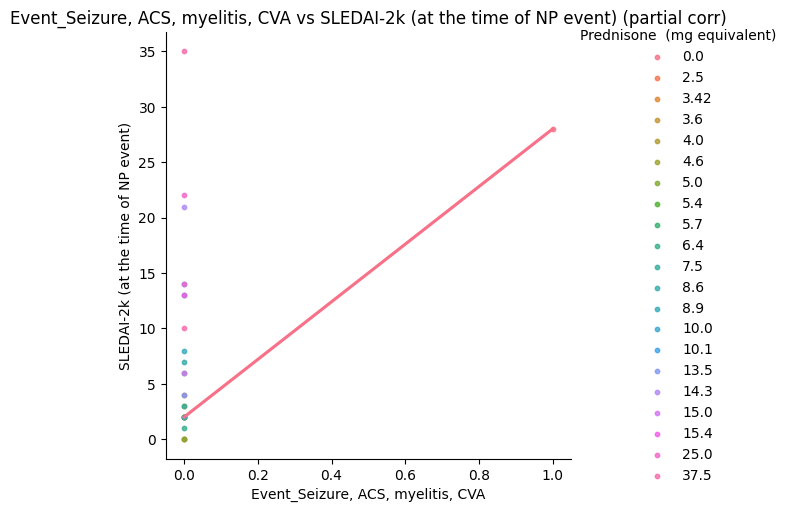

In [6]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
#df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[sledai])
    print(f'{col} vs {sledai}: r = {r:.5f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=sledai, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {sledai} (partial corr): r = {r_partial:.5f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {sledai} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.5f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.5f}, p = {p_mtg_partial:.5f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[sledai])
plt.xlabel(col)
plt.ylabel(sledai)
plt.title(f'{col} vs {sledai}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=sledai, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {sledai} (partial corr)')
plt.show()


In [7]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.5f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.5f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs IOG volume asymmetry: r = -0.27697, p = 0.16193
Event_CVA vs IOG volume asymmetry (partial corr): r = -0.32617, p = 0.12878
Event_Mood abnormalities (depressive) vs IOG volume asymmetry: r = 0.23259, p = 0.24303
Event_Mood abnormalities (depressive) vs IOG volume asymmetry (partial corr): r = 0.07122, p = 0.74675
Event_Mood abnormalities (mixed) vs IOG volume asymmetry: r = 0.30215, p = 0.12558
Event_Mood abnormalities (mixed) vs IOG volume asymmetry (partial corr): r = 0.28701, p = 0.18424
Event_Movement Disorder vs IOG volume asymmetry: r = -0.12589, p = 0.53150
Event_Movement Disorder vs IOG volume asymmetry (partial corr): r = -0.35368, p = 0.09780
Event_Psychosis vs IOG volume asymmetry: r = -0.01816, p = 0.92838
Event_Psychosis vs IOG volume asymmetry (partial corr): r = -0.08607, p = 0.69619
Event_Seizure vs IOG volume asymmetry: r = 0.12105, p = 0.54756
Event_Seizure vs IOG volume asymmetry (partial corr): r = 0.05173, p = 0.81467
Event_Seizure, ACS, myelitis, CVA 

In [8]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'
   
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.5f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.5f}, p = {p_mtg_partial:.5f}')

Calc total volume % vs SLEDAI-2k (at the time of NP event): r = 0.39122, p = 0.04360
Calc total volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.41730, p = 0.04758


In [9]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.5f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Calc total volume %: r = -0.20, p = 0.31369
Event_CVA vs Calc total volume % (partial corr): r = -0.03413, p = 0.87713
Event_Mood abnormalities (depressive) vs Calc total volume %: r = -0.05, p = 0.80836
Event_Mood abnormalities (depressive) vs Calc total volume % (partial corr): r = 0.11242, p = 0.60954
Event_Mood abnormalities (mixed) vs Calc total volume %: r = 0.08, p = 0.70806
Event_Mood abnormalities (mixed) vs Calc total volume % (partial corr): r = -0.06773, p = 0.75879
Event_Movement Disorder vs Calc total volume %: r = 0.03, p = 0.90079
Event_Movement Disorder vs Calc total volume % (partial corr): r = -0.27679, p = 0.20104
Event_Psychosis vs Calc total volume %: r = 0.27, p = 0.16933
Event_Psychosis vs Calc total volume % (partial corr): r = 0.45139, p = 0.03062
Event_Seizure vs Calc total volume %: r = -0.47, p = 0.01358
Event_Seizure vs Calc total volume % (partial corr): r = -0.33072, p = 0.12322
Event_Seizure, ACS, myelitis, CVA vs Calc total volume %: r = -

In [10]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'
 
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

Amygdala total volume % vs SLEDAI-2k (at the time of NP event): r = 0.38, p = 0.04848
Amygdala total volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.12, p = 0.60088


In [11]:
from scipy.stats import spearmanr
import pingouin as pg


# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Amygdala total volume %: r = -0.05, p = 0.80302
Event_CVA vs Amygdala total volume % (partial corr): r = -0.13, p = 0.55054
Event_Mood abnormalities (depressive) vs Amygdala total volume %: r = 0.18, p = 0.35925
Event_Mood abnormalities (depressive) vs Amygdala total volume % (partial corr): r = -0.05, p = 0.83420
Event_Mood abnormalities (mixed) vs Amygdala total volume %: r = 0.23, p = 0.25568
Event_Mood abnormalities (mixed) vs Amygdala total volume % (partial corr): r = 0.09, p = 0.69370
Event_Movement Disorder vs Amygdala total volume %: r = 0.30, p = 0.12558
Event_Movement Disorder vs Amygdala total volume % (partial corr): r = 0.19, p = 0.38893
Event_Psychosis vs Amygdala total volume %: r = 0.02, p = 0.92838
Event_Psychosis vs Amygdala total volume % (partial corr): r = -0.02, p = 0.91184
Event_Seizure vs Amygdala total volume %: r = -0.12, p = 0.54756
Event_Seizure vs Amygdala total volume % (partial corr): r = -0.07, p = 0.75813
Event_Seizure, ACS, myelitis, CVA 

In [12]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


Amygdala left volume % vs SLEDAI-2k (at the time of NP event): r = 0.35, p = 0.07213
Amygdala left volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.22, p = 0.31482


In [13]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Amygdala left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Amygdala left volume %: r = -0.10, p = 0.61718
Event_CVA vs Amygdala left volume % (partial corr): r = -0.19, p = 0.38599
Event_Mood abnormalities (depressive) vs Amygdala left volume %: r = 0.12, p = 0.54301
Event_Mood abnormalities (depressive) vs Amygdala left volume % (partial corr): r = -0.13, p = 0.54404
Event_Mood abnormalities (mixed) vs Amygdala left volume %: r = 0.18, p = 0.37918
Event_Mood abnormalities (mixed) vs Amygdala left volume % (partial corr): r = 0.02, p = 0.91630
Event_Movement Disorder vs Amygdala left volume %: r = 0.25, p = 0.20517
Event_Movement Disorder vs Amygdala left volume % (partial corr): r = 0.19, p = 0.37664
Event_Psychosis vs Amygdala left volume %: r = 0.07, p = 0.71885
Event_Psychosis vs Amygdala left volume % (partial corr): r = 0.14, p = 0.51175
Event_Seizure vs Amygdala left volume %: r = -0.20, p = 0.32543
Event_Seizure vs Amygdala left volume % (partial corr): r = -0.07, p = 0.75713
Event_Seizure, ACS, myelitis, CVA vs Amygdala l

In [14]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

IOG right volume % vs SLEDAI-2k (at the time of NP event): r = 0.37, p = 0.05702
IOG right volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.37, p = 0.08630


In [15]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs IOG right volume %: r = -0.33, p = 0.09559
Event_CVA vs IOG right volume % (partial corr): r = -0.46, p = 0.02669
Event_Mood abnormalities (depressive) vs IOG right volume %: r = 0.27, p = 0.17433
Event_Mood abnormalities (depressive) vs IOG right volume % (partial corr): r = 0.34, p = 0.10761
Event_Mood abnormalities (mixed) vs IOG right volume %: r = 0.28, p = 0.16193
Event_Mood abnormalities (mixed) vs IOG right volume % (partial corr): r = 0.15, p = 0.48184
Event_Movement Disorder vs IOG right volume %: r = -0.13, p = 0.53150
Event_Movement Disorder vs IOG right volume % (partial corr): r = -0.47, p = 0.02471
Event_Psychosis vs IOG right volume %: r = 0.05, p = 0.78728
Event_Psychosis vs IOG right volume % (partial corr): r = 0.09, p = 0.67039
Event_Seizure vs IOG right volume %: r = -0.11, p = 0.59903
Event_Seizure vs IOG right volume % (partial corr): r = 0.01, p = 0.97518
Event_Seizure, ACS, myelitis, CVA vs IOG right volume %: r = -0.10, p = 0.61718
Event_Seizure, 

In [16]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG total thickness norm.'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


PHG total thickness norm. vs SLEDAI-2k (at the time of NP event): r = 0.38, p = 0.05087
PHG total thickness norm. vs SLEDAI-2k (at the time of NP event) (partial corr): r = -0.22, p = 0.32375


In [17]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG total thickness norm.'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PHG total thickness norm.: r = -0.30, p = 0.12558
Event_CVA vs PHG total thickness norm. (partial corr): r = -0.51, p = 0.01362
Event_Mood abnormalities (depressive) vs PHG total thickness norm.: r = 0.24, p = 0.21840
Event_Mood abnormalities (depressive) vs PHG total thickness norm. (partial corr): r = 0.33, p = 0.12583
Event_Mood abnormalities (mixed) vs PHG total thickness norm.: r = 0.10, p = 0.61718
Event_Mood abnormalities (mixed) vs PHG total thickness norm. (partial corr): r = 0.04, p = 0.87245
Event_Movement Disorder vs PHG total thickness norm.: r = 0.30, p = 0.12558
Event_Movement Disorder vs PHG total thickness norm. (partial corr): r = 0.09, p = 0.69324
Event_Psychosis vs PHG total thickness norm.: r = 0.34, p = 0.07802
Event_Psychosis vs PHG total thickness norm. (partial corr): r = 0.17, p = 0.42801
Event_Seizure vs PHG total thickness norm.: r = -0.30, p = 0.12497
Event_Seizure vs PHG total thickness norm. (partial corr): r = -0.10, p = 0.64866
Event_Seizur

In [18]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = '4th Ventricle volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sledai])
print(f'{lesion_load} vs {sledai}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sledai, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sledai} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

4th Ventricle volume % vs SLEDAI-2k (at the time of NP event): r = 0.32, p = 0.10308
4th Ventricle volume % vs SLEDAI-2k (at the time of NP event) (partial corr): r = 0.58, p = 0.00410


In [19]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = '4th Ventricle volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sledai = 'SLEDAI-2k (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs 4th Ventricle volume %: r = 0.08, p = 0.70806
Event_CVA vs 4th Ventricle volume % (partial corr): r = 0.02, p = 0.91379
Event_Mood abnormalities (depressive) vs 4th Ventricle volume %: r = 0.06, p = 0.76168
Event_Mood abnormalities (depressive) vs 4th Ventricle volume % (partial corr): r = -0.29, p = 0.17364
Event_Mood abnormalities (mixed) vs 4th Ventricle volume %: r = 0.13, p = 0.53150
Event_Mood abnormalities (mixed) vs 4th Ventricle volume % (partial corr): r = -0.01, p = 0.96184
Event_Movement Disorder vs 4th Ventricle volume %: r = -0.18, p = 0.37918
Event_Movement Disorder vs 4th Ventricle volume % (partial corr): r = -0.20, p = 0.35669
Event_Psychosis vs 4th Ventricle volume %: r = 0.04, p = 0.85729
Event_Psychosis vs 4th Ventricle volume % (partial corr): r = 0.32, p = 0.14095
Event_Seizure vs 4th Ventricle volume %: r = 0.21, p = 0.28882
Event_Seizure vs 4th Ventricle volume % (partial corr): r = -0.08, p = 0.71016
Event_Seizure, ACS, myelitis, CVA vs 4th Ventri

## SLICCDI

Event_CVA vs SLICC-DI (at the time of NP event): r = 0.11, p = 0.59
Event_CVA vs SLICC-DI (at the time of NP event) (partial corr): r = -0.14, p = 0.51632
Event_Mood abnormalities (depressive) vs SLICC-DI (at the time of NP event): r = -0.15, p = 0.45
Event_Mood abnormalities (depressive) vs SLICC-DI (at the time of NP event) (partial corr): r = -0.48, p = 0.02033
Event_Mood abnormalities (mixed) vs SLICC-DI (at the time of NP event): r = -0.18, p = 0.37
Event_Mood abnormalities (mixed) vs SLICC-DI (at the time of NP event) (partial corr): r = -0.14, p = 0.53032
Event_Movement Disorder vs SLICC-DI (at the time of NP event): r = 0.25, p = 0.21
Event_Movement Disorder vs SLICC-DI (at the time of NP event) (partial corr): r = 0.28, p = 0.20122
Event_Psychosis vs SLICC-DI (at the time of NP event): r = 0.45, p = 0.02
Event_Psychosis vs SLICC-DI (at the time of NP event) (partial corr): r = 0.55, p = 0.00623
Event_Seizure vs SLICC-DI (at the time of NP event): r = 0.17, p = 0.39
Event_Seizu

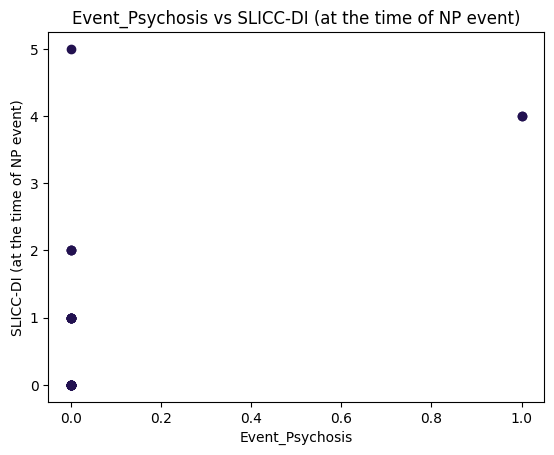

<Figure size 640x480 with 0 Axes>

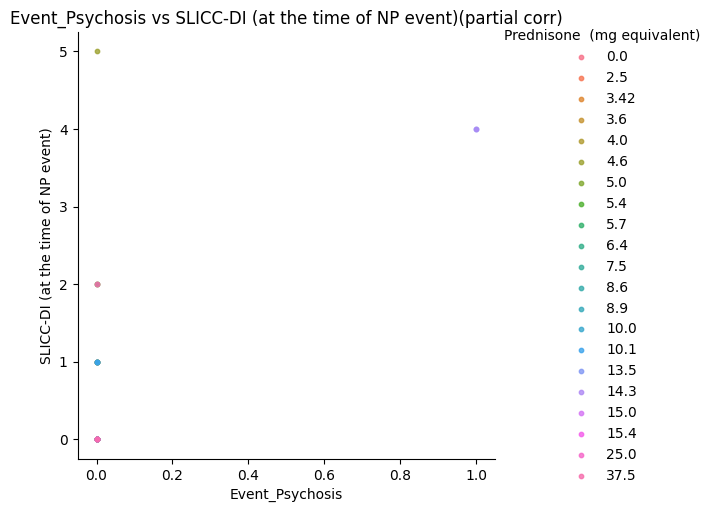

In [30]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[slicc])
    print(f'{col} vs {slicc}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=slicc, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {slicc} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {slicc} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df['Event_Psychosis'], df[slicc])
plt.xlabel('Event_Psychosis')
plt.ylabel(slicc)
plt.title('Event_Psychosis vs ' + slicc)
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x='Event_Psychosis', y=slicc, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title('Event_Psychosis vs ' + slicc + '(partial corr)')
plt.show()


In [21]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OpIFG total volume %: r = -0.33, p = 0.09559
Event_CVA vs OpIFG total volume % (partial corr): r = -0.42, p = 0.04880
Event_Mood abnormalities (depressive) vs OpIFG total volume %: r = 0.07, p = 0.71580
Event_Mood abnormalities (depressive) vs OpIFG total volume % (partial corr): r = 0.52, p = 0.01138
Event_Mood abnormalities (mixed) vs OpIFG total volume %: r = 0.25, p = 0.20517
Event_Mood abnormalities (mixed) vs OpIFG total volume % (partial corr): r = 0.25, p = 0.25814
Event_Movement Disorder vs OpIFG total volume %: r = 0.03, p = 0.90079
Event_Movement Disorder vs OpIFG total volume % (partial corr): r = -0.32, p = 0.13792
Event_Psychosis vs OpIFG total volume %: r = -0.36, p = 0.06264
Event_Psychosis vs OpIFG total volume % (partial corr): r = -0.32, p = 0.14051
Event_Seizure vs OpIFG total volume %: r = -0.29, p = 0.14594
Event_Seizure vs OpIFG total volume % (partial corr): r = 0.06, p = 0.77489
Event_Seizure, ACS, myelitis, CVA vs OpIFG total volume %: r = -0.25, 

In [22]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPoG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

MPoG right volume % vs SLICC-DI (at the time of NP event): r = -0.54, p = 0.00337
MPoG right volume % vs SLICC-DI (at the time of NP event) (partial corr): r = -0.47, p = 0.02239


In [23]:
from scipy.stats import spearmanr
import pingouin as pg

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPoG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MPoG right volume %: r = 0.10, p = 0.61718
Event_CVA vs MPoG right volume % (partial corr): r = 0.04, p = 0.83894
Event_Mood abnormalities (depressive) vs MPoG right volume %: r = 0.11, p = 0.58434
Event_Mood abnormalities (depressive) vs MPoG right volume % (partial corr): r = 0.20, p = 0.36908
Event_Mood abnormalities (mixed) vs MPoG right volume %: r = 0.23, p = 0.25568
Event_Mood abnormalities (mixed) vs MPoG right volume % (partial corr): r = 0.26, p = 0.22812
Event_Movement Disorder vs MPoG right volume %: r = -0.33, p = 0.09559
Event_Movement Disorder vs MPoG right volume % (partial corr): r = -0.22, p = 0.30234
Event_Psychosis vs MPoG right volume %: r = -0.34, p = 0.07802
Event_Psychosis vs MPoG right volume % (partial corr): r = -0.32, p = 0.13970
Event_Seizure vs MPoG right volume %: r = 0.03, p = 0.88089
Event_Seizure vs MPoG right volume % (partial corr): r = 0.10, p = 0.65571
Event_Seizure, ACS, myelitis, CVA vs MPoG right volume %: r = -0.28, p = 0.16193
Eve

In [24]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Ventral DC left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


Ventral DC left volume % vs SLICC-DI (at the time of NP event): r = -0.49, p = 0.00869
Ventral DC left volume % vs SLICC-DI (at the time of NP event) (partial corr): r = -0.53, p = 0.00996


In [25]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Ventral DC left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Ventral DC left volume %: r = 0.10, p = 0.61718
Event_CVA vs Ventral DC left volume % (partial corr): r = 0.24, p = 0.26137
Event_Mood abnormalities (depressive) vs Ventral DC left volume %: r = 0.04, p = 0.85570
Event_Mood abnormalities (depressive) vs Ventral DC left volume % (partial corr): r = 0.25, p = 0.24598
Event_Mood abnormalities (mixed) vs Ventral DC left volume %: r = 0.33, p = 0.09559
Event_Mood abnormalities (mixed) vs Ventral DC left volume % (partial corr): r = 0.30, p = 0.15848
Event_Movement Disorder vs Ventral DC left volume %: r = 0.15, p = 0.45194
Event_Movement Disorder vs Ventral DC left volume % (partial corr): r = -0.17, p = 0.43134
Event_Psychosis vs Ventral DC left volume %: r = -0.31, p = 0.11723
Event_Psychosis vs Ventral DC left volume % (partial corr): r = -0.19, p = 0.39597
Event_Seizure vs Ventral DC left volume %: r = -0.26, p = 0.19524
Event_Seizure vs Ventral DC left volume % (partial corr): r = -0.30, p = 0.16182
Event_Seizure, ACS, mye

In [26]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Insular right thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

Insular right thickness mm vs SLICC-DI (at the time of NP event): r = -0.49, p = 0.01019
Insular right thickness mm vs SLICC-DI (at the time of NP event) (partial corr): r = -0.44, p = 0.03604


In [27]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Insular right thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Insular right thickness mm: r = -0.23, p = 0.25568
Event_CVA vs Insular right thickness mm (partial corr): r = -0.23, p = 0.29693
Event_Mood abnormalities (depressive) vs Insular right thickness mm: r = 0.29, p = 0.13691
Event_Mood abnormalities (depressive) vs Insular right thickness mm (partial corr): r = 0.50, p = 0.01487
Event_Mood abnormalities (mixed) vs Insular right thickness mm: r = 0.13, p = 0.53150
Event_Mood abnormalities (mixed) vs Insular right thickness mm (partial corr): r = 0.08, p = 0.70449
Event_Movement Disorder vs Insular right thickness mm: r = 0.30, p = 0.12558
Event_Movement Disorder vs Insular right thickness mm (partial corr): r = 0.06, p = 0.79630
Event_Psychosis vs Insular right thickness mm: r = -0.27, p = 0.16933
Event_Psychosis vs Insular right thickness mm (partial corr): r = -0.26, p = 0.22957
Event_Seizure vs Insular right thickness mm: r = -0.18, p = 0.36474
Event_Seizure vs Insular right thickness mm (partial corr): r = -0.11, p = 0.6312

In [28]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SMG total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[slicc])
print(f'{lesion_load} vs {slicc}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=slicc, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {slicc} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

SMG total volume % vs SLICC-DI (at the time of NP event): r = -0.51, p = 0.00604
SMG total volume % vs SLICC-DI (at the time of NP event) (partial corr): r = -0.45, p = 0.03086


In [29]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SMG total volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
slicc = 'SLICC-DI (at the time of NP event)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SMG total volume %: r = -0.33, p = 0.09559
Event_CVA vs SMG total volume % (partial corr): r = -0.36, p = 0.09583
Event_Mood abnormalities (depressive) vs SMG total volume %: r = 0.18, p = 0.35925
Event_Mood abnormalities (depressive) vs SMG total volume % (partial corr): r = 0.49, p = 0.01741
Event_Mood abnormalities (mixed) vs SMG total volume %: r = 0.23, p = 0.25568
Event_Mood abnormalities (mixed) vs SMG total volume % (partial corr): r = 0.22, p = 0.32330
Event_Movement Disorder vs SMG total volume %: r = 0.13, p = 0.53150
Event_Movement Disorder vs SMG total volume % (partial corr): r = -0.09, p = 0.67210
Event_Psychosis vs SMG total volume %: r = -0.29, p = 0.14156
Event_Psychosis vs SMG total volume % (partial corr): r = -0.22, p = 0.31501
Event_Seizure vs SMG total volume %: r = -0.35, p = 0.07527
Event_Seizure vs SMG total volume % (partial corr): r = -0.15, p = 0.50367
Event_Seizure, ACS, myelitis, CVA vs SMG total volume %: r = -0.28, p = 0.16193
Event_Seizure

## dsDNA

Event_CVA vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.00, p = 1.00000
Event_CVA vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.08, p = 0.71134
Event_Mood abnormalities (depressive) vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.07, p = 0.73855
Event_Mood abnormalities (depressive) vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.14, p = 0.51009
Event_Mood abnormalities (mixed) vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.10, p = 0.61708
Event_Mood abnormalities (mixed) vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.13, p = 0.55933
Event_Movement Disorder vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.05, p = 0.80296
Event_Movement Disorder vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.32, p = 0.13359
Event_Psychosis vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.00, p = 1.00000
Event_Psychosis vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.12, p = 0.57700
Event_Seizure vs anti-dsDNA 

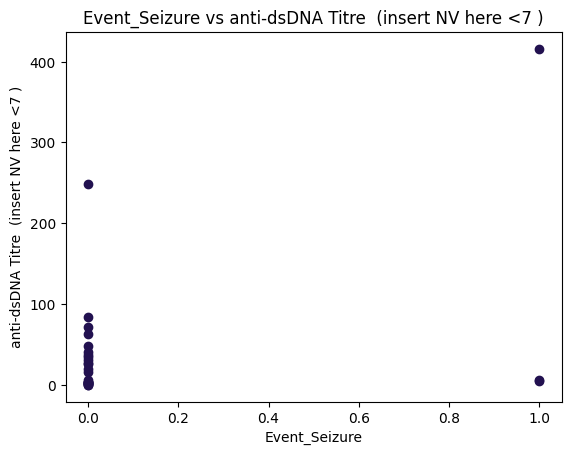

<Figure size 640x480 with 0 Axes>

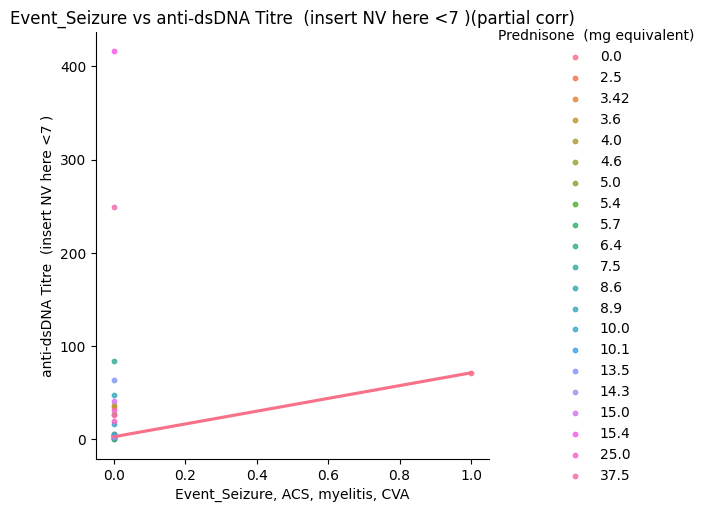

In [31]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AOrG thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[dsDNA])
    print(f'{col} vs {dsDNA}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=dsDNA, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {dsDNA} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {dsDNA} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df['Event_Seizure'], df[dsDNA])
plt.xlabel('Event_Seizure')
plt.ylabel(dsDNA)
plt.title('Event_Seizure vs ' + dsDNA)
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=dsDNA, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title('Event_Seizure vs ' + dsDNA + '(partial corr)')
plt.show()


In [32]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AOrG thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AOrG thickness asymmetry: r = 0.33, p = 0.09559
Event_CVA vs AOrG thickness asymmetry (partial corr): r = 0.35, p = 0.10547
Event_Mood abnormalities (depressive) vs AOrG thickness asymmetry: r = 0.28, p = 0.15482
Event_Mood abnormalities (depressive) vs AOrG thickness asymmetry (partial corr): r = 0.34, p = 0.11624
Event_Mood abnormalities (mixed) vs AOrG thickness asymmetry: r = -0.10, p = 0.61718
Event_Mood abnormalities (mixed) vs AOrG thickness asymmetry (partial corr): r = -0.13, p = 0.55313
Event_Movement Disorder vs AOrG thickness asymmetry: r = 0.00, p = 1.00000
Event_Movement Disorder vs AOrG thickness asymmetry (partial corr): r = 0.03, p = 0.90560
Event_Psychosis vs AOrG thickness asymmetry: r = -0.09, p = 0.65247
Event_Psychosis vs AOrG thickness asymmetry (partial corr): r = -0.21, p = 0.32633
Event_Seizure vs AOrG thickness asymmetry: r = -0.09, p = 0.65247
Event_Seizure vs AOrG thickness asymmetry (partial corr): r = -0.15, p = 0.49413
Event_Seizure, ACS, my

In [33]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SPL volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


SPL volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ): r = -0.43, p = 0.02686
SPL volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.15, p = 0.48049


In [34]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SPL volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SPL volume asymmetry: r = 0.05, p = 0.80302
Event_CVA vs SPL volume asymmetry (partial corr): r = 0.06, p = 0.78809
Event_Mood abnormalities (depressive) vs SPL volume asymmetry: r = 0.23, p = 0.24303
Event_Mood abnormalities (depressive) vs SPL volume asymmetry (partial corr): r = 0.33, p = 0.11982
Event_Mood abnormalities (mixed) vs SPL volume asymmetry: r = -0.18, p = 0.37918
Event_Mood abnormalities (mixed) vs SPL volume asymmetry (partial corr): r = -0.25, p = 0.24580
Event_Movement Disorder vs SPL volume asymmetry: r = 0.10, p = 0.61718
Event_Movement Disorder vs SPL volume asymmetry (partial corr): r = 0.11, p = 0.63219
Event_Psychosis vs SPL volume asymmetry: r = -0.27, p = 0.16933
Event_Psychosis vs SPL volume asymmetry (partial corr): r = -0.27, p = 0.21571
Event_Seizure vs SPL volume asymmetry: r = 0.11, p = 0.59903
Event_Seizure vs SPL volume asymmetry (partial corr): r = 0.06, p = 0.76899
Event_Seizure, ACS, myelitis, CVA vs SPL volume asymmetry: r = -0.30, p 

In [35]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

AnG total thickness mm vs anti-dsDNA Titre  (insert NV here <7 ): r = -0.43, p = 0.02698
AnG total thickness mm vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.31, p = 0.14646


In [36]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG total thickness mm: r = -0.25, p = 0.20517
Event_CVA vs AnG total thickness mm (partial corr): r = -0.12, p = 0.60067
Event_Mood abnormalities (depressive) vs AnG total thickness mm: r = -0.17, p = 0.39271
Event_Mood abnormalities (depressive) vs AnG total thickness mm (partial corr): r = 0.16, p = 0.45646
Event_Mood abnormalities (mixed) vs AnG total thickness mm: r = 0.05, p = 0.80302
Event_Mood abnormalities (mixed) vs AnG total thickness mm (partial corr): r = 0.10, p = 0.66375
Event_Movement Disorder vs AnG total thickness mm: r = 0.25, p = 0.20517
Event_Movement Disorder vs AnG total thickness mm (partial corr): r = 0.22, p = 0.31088
Event_Psychosis vs AnG total thickness mm: r = -0.09, p = 0.65247
Event_Psychosis vs AnG total thickness mm (partial corr): r = 0.08, p = 0.72043
Event_Seizure vs AnG total thickness mm: r = -0.35, p = 0.07527
Event_Seizure vs AnG total thickness mm (partial corr): r = -0.09, p = 0.66936
Event_Seizure, ACS, myelitis, CVA vs AnG total

In [37]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

OpIFG volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ): r = 0.42, p = 0.02809
OpIFG volume asymmetry vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = 0.18, p = 0.42438


In [38]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OpIFG volume asymmetry: r = 0.28, p = 0.16193
Event_CVA vs OpIFG volume asymmetry (partial corr): r = 0.32, p = 0.14024
Event_Mood abnormalities (depressive) vs OpIFG volume asymmetry: r = 0.16, p = 0.42787
Event_Mood abnormalities (depressive) vs OpIFG volume asymmetry (partial corr): r = 0.17, p = 0.42587
Event_Mood abnormalities (mixed) vs OpIFG volume asymmetry: r = 0.10, p = 0.61718
Event_Mood abnormalities (mixed) vs OpIFG volume asymmetry (partial corr): r = 0.01, p = 0.97670
Event_Movement Disorder vs OpIFG volume asymmetry: r = 0.08, p = 0.70806
Event_Movement Disorder vs OpIFG volume asymmetry (partial corr): r = 0.01, p = 0.97938
Event_Psychosis vs OpIFG volume asymmetry: r = -0.04, p = 0.85729
Event_Psychosis vs OpIFG volume asymmetry (partial corr): r = -0.03, p = 0.88596
Event_Seizure vs OpIFG volume asymmetry: r = -0.24, p = 0.22375
Event_Seizure vs OpIFG volume asymmetry (partial corr): r = -0.25, p = 0.24518
Event_Seizure, ACS, myelitis, CVA vs OpIFG volum

In [39]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG left thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dsDNA])
print(f'{lesion_load} vs {dsDNA}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dsDNA, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dsDNA} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


AnG left thickness mm vs anti-dsDNA Titre  (insert NV here <7 ): r = -0.41, p = 0.03556
AnG left thickness mm vs anti-dsDNA Titre  (insert NV here <7 ) (partial corr): r = -0.39, p = 0.06363


In [40]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG left thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dsDNA = 'anti-dsDNA Titre  (insert NV here <7 )'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs AnG left thickness mm: r = -0.20, p = 0.31369
Event_CVA vs AnG left thickness mm (partial corr): r = -0.06, p = 0.77255
Event_Mood abnormalities (depressive) vs AnG left thickness mm: r = -0.02, p = 0.90352
Event_Mood abnormalities (depressive) vs AnG left thickness mm (partial corr): r = 0.22, p = 0.30889
Event_Mood abnormalities (mixed) vs AnG left thickness mm: r = 0.03, p = 0.90079
Event_Mood abnormalities (mixed) vs AnG left thickness mm (partial corr): r = 0.07, p = 0.76201
Event_Movement Disorder vs AnG left thickness mm: r = 0.30, p = 0.12558
Event_Movement Disorder vs AnG left thickness mm (partial corr): r = 0.30, p = 0.15802
Event_Psychosis vs AnG left thickness mm: r = -0.05, p = 0.78728
Event_Psychosis vs AnG left thickness mm (partial corr): r = 0.09, p = 0.68575
Event_Seizure vs AnG left thickness mm: r = -0.48, p = 0.01049
Event_Seizure vs AnG left thickness mm (partial corr): r = -0.27, p = 0.20892
Event_Seizure, ACS, myelitis, CVA vs AnG left thickness mm

## C3 mg/dL

Event_CVA vs C3 (mgdl): r = 0.05, p = 0.80
Event_CVA vs C3 (mgdl) (partial corr): r = 0.06, p = 0.79435
Event_Mood abnormalities (depressive) vs C3 (mgdl): r = -0.22, p = 0.27
Event_Mood abnormalities (depressive) vs C3 (mgdl) (partial corr): r = -0.26, p = 0.23806
Event_Mood abnormalities (mixed) vs C3 (mgdl): r = 0.28, p = 0.16
Event_Mood abnormalities (mixed) vs C3 (mgdl) (partial corr): r = 0.46, p = 0.02841
Event_Movement Disorder vs C3 (mgdl): r = 0.23, p = 0.26
Event_Movement Disorder vs C3 (mgdl) (partial corr): r = 0.38, p = 0.07633
Event_Psychosis vs C3 (mgdl): r = -0.23, p = 0.25
Event_Psychosis vs C3 (mgdl) (partial corr): r = -0.18, p = 0.40423
Event_Seizure vs C3 (mgdl): r = -0.09, p = 0.65
Event_Seizure vs C3 (mgdl) (partial corr): r = -0.08, p = 0.70338
Event_Seizure, ACS, myelitis, CVA vs C3 (mgdl): r = 0.14, p = 0.49
Event_Seizure, ACS, myelitis, CVA vs C3 (mgdl) (partial corr): r = 0.04, p = 0.87236
Calc right volume % vs C3 (mgdl): r = -0.53, p = 0.00454
Calc right 

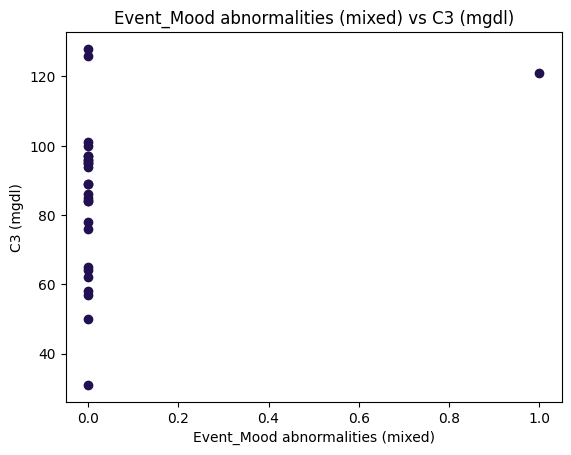

<Figure size 640x480 with 0 Axes>

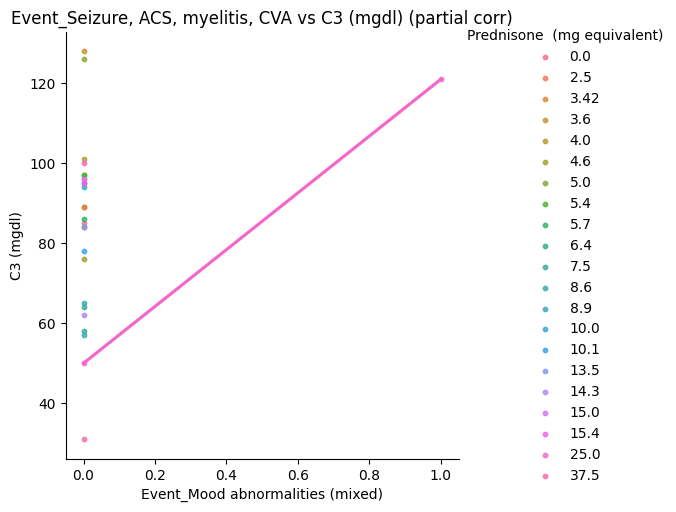

In [22]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and SLEDAI
    r, p = spearmanr(df[col], df[C3])
    print(f'{col} vs {C3}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=C3, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {C3} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {C3} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df['Event_Mood abnormalities (mixed)'], df[C3])
plt.xlabel('Event_Mood abnormalities (mixed)')
plt.ylabel(C3)
plt.title('Event_Mood abnormalities (mixed) vs ' + C3)
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x='Event_Mood abnormalities (mixed)', y=C3, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {C3} (partial corr)')
plt.show()


In [23]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Calc right volume %: r = -0.30, p = 0.12558
Event_CVA vs Calc right volume % (partial corr): r = -0.24, p = 0.29068
Event_Mood abnormalities (depressive) vs Calc right volume %: r = 0.12, p = 0.54301
Event_Mood abnormalities (depressive) vs Calc right volume % (partial corr): r = 0.26, p = 0.23706
Event_Mood abnormalities (mixed) vs Calc right volume %: r = 0.08, p = 0.70806
Event_Mood abnormalities (mixed) vs Calc right volume % (partial corr): r = -0.08, p = 0.73310
Event_Movement Disorder vs Calc right volume %: r = -0.03, p = 0.90079
Event_Movement Disorder vs Calc right volume % (partial corr): r = -0.15, p = 0.51164
Event_Psychosis vs Calc right volume %: r = 0.20, p = 0.31789
Event_Psychosis vs Calc right volume % (partial corr): r = 0.37, p = 0.08984
Event_Seizure vs Calc right volume %: r = -0.41, p = 0.03438
Event_Seizure vs Calc right volume % (partial corr): r = -0.21, p = 0.34472
Event_Seizure, ACS, myelitis, CVA vs Calc right volume %: r = -0.08, p = 0.70806


In [24]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, sledai, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


Calc total volume cm3 vs C3 (mgdl): r = -0.52, p = 0.00580
Calc total volume cm3 vs C3 (mgdl) (partial corr): r = -0.49, p = 0.02058


In [25]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
#df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Calc total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone,sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Calc total volume cm3: r = -0.18, p = 0.37918
Event_CVA vs Calc total volume cm3 (partial corr): r = 0.05, p = 0.83739
Event_Mood abnormalities (depressive) vs Calc total volume cm3: r = -0.13, p = 0.50309
Event_Mood abnormalities (depressive) vs Calc total volume cm3 (partial corr): r = 0.09, p = 0.69706
Event_Mood abnormalities (mixed) vs Calc total volume cm3: r = -0.25, p = 0.20517
Event_Mood abnormalities (mixed) vs Calc total volume cm3 (partial corr): r = -0.18, p = 0.41616
Event_Movement Disorder vs Calc total volume cm3: r = -0.08, p = 0.70806
Event_Movement Disorder vs Calc total volume cm3 (partial corr): r = -0.00, p = 0.98797
Event_Psychosis vs Calc total volume cm3: r = 0.31, p = 0.11723
Event_Psychosis vs Calc total volume cm3 (partial corr): r = 0.54, p = 0.00983
Event_Seizure vs Calc total volume cm3: r = -0.48, p = 0.01049
Event_Seizure vs Calc total volume cm3 (partial corr): r = -0.34, p = 0.12571
Event_Seizure, ACS, myelitis, CVA vs Calc total volume c

In [26]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, sledai, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


IOG total volume cm3 vs C3 (mgdl): r = -0.45, p = 0.01843
IOG total volume cm3 vs C3 (mgdl) (partial corr): r = -0.45, p = 0.03774


In [27]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'IOG total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs IOG total volume cm3: r = -0.33, p = 0.09559
Event_CVA vs IOG total volume cm3 (partial corr): r = -0.38, p = 0.08155
Event_Mood abnormalities (depressive) vs IOG total volume cm3: r = 0.09, p = 0.67086
Event_Mood abnormalities (depressive) vs IOG total volume cm3 (partial corr): r = 0.31, p = 0.16705
Event_Mood abnormalities (mixed) vs IOG total volume cm3: r = -0.30, p = 0.12558
Event_Mood abnormalities (mixed) vs IOG total volume cm3 (partial corr): r = -0.25, p = 0.26376
Event_Movement Disorder vs IOG total volume cm3: r = -0.25, p = 0.20517
Event_Movement Disorder vs IOG total volume cm3 (partial corr): r = -0.18, p = 0.42001
Event_Psychosis vs IOG total volume cm3: r = 0.20, p = 0.31789
Event_Psychosis vs IOG total volume cm3 (partial corr): r = 0.27, p = 0.22746
Event_Seizure vs IOG total volume cm3: r = 0.08, p = 0.70763
Event_Seizure vs IOG total volume cm3 (partial corr): r = 0.07, p = 0.75541
Event_Seizure, ACS, myelitis, CVA vs IOG total volume cm3: r = -0.23, 

In [30]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SOG right volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and SLEDAI
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, sledai,  np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


SOG right volume cm3 vs C3 (mgdl): r = -0.45, p = 0.01934
SOG right volume cm3 vs C3 (mgdl) (partial corr): r = -0.59, p = 0.00396


In [31]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SOG right volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SOG right volume cm3: r = 0.18, p = 0.37918
Event_CVA vs SOG right volume cm3 (partial corr): r = 0.23, p = 0.30829
Event_Mood abnormalities (depressive) vs SOG right volume cm3: r = -0.17, p = 0.39271
Event_Mood abnormalities (depressive) vs SOG right volume cm3 (partial corr): r = 0.10, p = 0.66815
Event_Mood abnormalities (mixed) vs SOG right volume cm3: r = -0.30, p = 0.12558
Event_Mood abnormalities (mixed) vs SOG right volume cm3 (partial corr): r = -0.28, p = 0.19999
Event_Movement Disorder vs SOG right volume cm3: r = 0.05, p = 0.80302
Event_Movement Disorder vs SOG right volume cm3 (partial corr): r = 0.18, p = 0.41913
Event_Psychosis vs SOG right volume cm3: r = 0.02, p = 0.92838
Event_Psychosis vs SOG right volume cm3 (partial corr): r = 0.15, p = 0.49847
Event_Seizure vs SOG right volume cm3: r = -0.02, p = 0.94029
Event_Seizure vs SOG right volume cm3 (partial corr): r = -0.25, p = 0.26421
Event_Seizure, ACS, myelitis, CVA vs SOG right volume cm3: r = -0.23, p

In [18]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and C3
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, sledai, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


PHG right volume % vs C3 (mgdl): r = -0.49, p = 0.00942
PHG right volume % vs C3 (mgdl) (partial corr): r = -0.29, p = 0.19590


In [19]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PHG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PHG right volume %: r = 0.03, p = 0.90079
Event_CVA vs PHG right volume % (partial corr): r = -0.04, p = 0.85973
Event_Mood abnormalities (depressive) vs PHG right volume %: r = 0.04, p = 0.85570
Event_Mood abnormalities (depressive) vs PHG right volume % (partial corr): r = -0.03, p = 0.90442
Event_Mood abnormalities (mixed) vs PHG right volume %: r = -0.05, p = 0.80302
Event_Mood abnormalities (mixed) vs PHG right volume % (partial corr): r = -0.12, p = 0.57973
Event_Movement Disorder vs PHG right volume %: r = 0.30, p = 0.12558
Event_Movement Disorder vs PHG right volume % (partial corr): r = 0.39, p = 0.07198
Event_Psychosis vs PHG right volume %: r = -0.05, p = 0.78728
Event_Psychosis vs PHG right volume % (partial corr): r = -0.10, p = 0.65347
Event_Seizure vs PHG right volume %: r = 0.17, p = 0.40670
Event_Seizure vs PHG right volume % (partial corr): r = 0.09, p = 0.69213
Event_Seizure, ACS, myelitis, CVA vs PHG right volume %: r = -0.28, p = 0.16193
Event_Seizure,

In [28]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'TTG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

    
# Compute the Pearson correlation between MTG thickness and C3
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, sledai, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


TTG volume asymmetry vs C3 (mgdl): r = -0.39, p = 0.04444
TTG volume asymmetry vs C3 (mgdl) (partial corr): r = -0.57, p = 0.00587


In [29]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'TTG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs TTG volume asymmetry: r = -0.13, p = 0.53150
Event_CVA vs TTG volume asymmetry (partial corr): r = -0.06, p = 0.78055
Event_Mood abnormalities (depressive) vs TTG volume asymmetry: r = 0.15, p = 0.46468
Event_Mood abnormalities (depressive) vs TTG volume asymmetry (partial corr): r = 0.41, p = 0.05945
Event_Mood abnormalities (mixed) vs TTG volume asymmetry: r = -0.20, p = 0.31369
Event_Mood abnormalities (mixed) vs TTG volume asymmetry (partial corr): r = -0.23, p = 0.31204
Event_Movement Disorder vs TTG volume asymmetry: r = -0.15, p = 0.45194
Event_Movement Disorder vs TTG volume asymmetry (partial corr): r = -0.20, p = 0.36425
Event_Psychosis vs TTG volume asymmetry: r = 0.04, p = 0.85729
Event_Psychosis vs TTG volume asymmetry (partial corr): r = 0.11, p = 0.64184
Event_Seizure vs TTG volume asymmetry: r = -0.32, p = 0.10629
Event_Seizure vs TTG volume asymmetry (partial corr): r = -0.13, p = 0.55594
Event_Seizure, ACS, myelitis, CVA vs TTG volume asymmetry: r = -0.33

In [9]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

    
# Compute the Pearson correlation between MTG thickness and C3
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C3])
print(f'{lesion_load} vs {C3}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C3, covar=[prednisone, sledai, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C3} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


Abnormal Appearing White Matter volume % vs C3 (mgdl): r = 0.01, p = 0.95779
Abnormal Appearing White Matter volume % vs C3 (mgdl) (partial corr): r = 0.05, p = 0.82702


In [7]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCu left thickness norm.'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C3 = 'C3 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, sledai, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs PCu left thickness norm.: r = 0.15, p = 0.45194
Event_CVA vs PCu left thickness norm. (partial corr): r = -0.02, p = 0.93400
Event_Mood abnormalities (depressive) vs PCu left thickness norm.: r = -0.23, p = 0.24303
Event_Mood abnormalities (depressive) vs PCu left thickness norm. (partial corr): r = -0.29, p = 0.18646
Event_Mood abnormalities (mixed) vs PCu left thickness norm.: r = 0.23, p = 0.25568
Event_Mood abnormalities (mixed) vs PCu left thickness norm. (partial corr): r = 0.06, p = 0.78766
Event_Movement Disorder vs PCu left thickness norm.: r = 0.33, p = 0.09559
Event_Movement Disorder vs PCu left thickness norm. (partial corr): r = 0.37, p = 0.08782
Event_Psychosis vs PCu left thickness norm.: r = 0.18, p = 0.36474
Event_Psychosis vs PCu left thickness norm. (partial corr): r = 0.23, p = 0.29930
Event_Seizure vs PCu left thickness norm.: r = -0.02, p = 0.94029
Event_Seizure vs PCu left thickness norm. (partial corr): r = -0.13, p = 0.55478
Event_Seizure, ACS, mye

## C4 mg/dL

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MTG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[C4])
    print(f'{col} vs {C4}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=C4, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {C4} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {C4} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[C4])
plt.xlabel(col)
plt.ylabel(C4)
plt.title(f'{col} vs {C4}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=C4, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {C4} (partial corr)')
plt.show()


In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MTG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'FRP right volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'FRP right volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns left volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PIns left volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'ITG thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[C4])
print(f'{lesion_load} vs {C4}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=C4, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {C4} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'ITG thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
C4 = 'C4 (mgdl)'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

## AnAb

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA left thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[AnAb])
    print(f'{col} vs {AnAb}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=AnAb, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {AnAb} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {AnAb} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[AnAb])
plt.xlabel(col)
plt.ylabel(AnAb)
plt.title(f'{col} vs {AnAb}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=AnAb, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {AnAb} (partial corr)')
plt.show()


In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MFG total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MFG total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[AnAb])
print(f'{lesion_load} vs {AnAb}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=AnAb, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {AnAb} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Temporal total thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
AnAb = 'AnAb '

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

## Anti-Sm

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[sm])
    print(f'{col} vs {sm}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=sm, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {sm} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {AnAb} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sm])
print(f'{lesion_load} vs {sm}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sm, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sm} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[sm])
plt.xlabel(col)
plt.ylabel(sm)
plt.title(f'{col} vs {sm}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=sm, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {sm} (partial corr)')
plt.show()


In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG volume asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sm = 'anti-Sm'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sm])
print(f'{lesion_load} vs {sm}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sm, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sm} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'LiG left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCgG right thickness norm.'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sm = 'anti-Sm'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[sm])
print(f'{lesion_load} vs {sm}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=sm, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {sm} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'PCgG right thickness norm.'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
sm = 'anti-Sm'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

## Anti-Rib-P

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG left volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[rib])
    print(f'{col} vs {rib}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=rib, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {rib} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {AnAb} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[rib])
plt.xlabel(col)
plt.ylabel(rib)
plt.title(f'{col} vs {rib}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=rib, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {rib} (partial corr)')
plt.show()


In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OpIFG left volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPrG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPrG right volume %'
prednisone = 'prednisone_cat'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'GRe thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'GRe thickness asymmetry'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'AnG right thickness mm'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP left thickness norm.'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[rib])
print(f'{lesion_load} vs {rib}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=rib, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {rib} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

In [ ]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP left thickness norm.'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
rib = 'Anti-Rib-P'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

## DWEYS

Event_CVA vs Anti-DWEYS: r = -0.14, p = 0.49
Event_CVA vs Anti-DWEYS (partial corr): r = -0.16, p = 0.47
Event_Mood abnormalities (depressive) vs Anti-DWEYS: r = 0.47, p = 0.01
Event_Mood abnormalities (depressive) vs Anti-DWEYS (partial corr): r = 0.46, p = 0.03
Event_Mood abnormalities (mixed) vs Anti-DWEYS: r = -0.14, p = 0.49
Event_Mood abnormalities (mixed) vs Anti-DWEYS (partial corr): r = -0.26, p = 0.24
Event_Movement Disorder vs Anti-DWEYS: r = 0.28, p = 0.16
Event_Movement Disorder vs Anti-DWEYS (partial corr): r = 0.23, p = 0.30
Event_Psychosis vs Anti-DWEYS: r = -0.20, p = 0.32
Event_Psychosis vs Anti-DWEYS (partial corr): r = -0.24, p = 0.27
Event_Seizure vs Anti-DWEYS: r = -0.25, p = 0.21
Event_Seizure vs Anti-DWEYS (partial corr): r = -0.37, p = 0.09
Event_Seizure, ACS, myelitis, CVA vs Anti-DWEYS: r = 0.28, p = 0.16
Event_Seizure, ACS, myelitis, CVA vs Anti-DWEYS (partial corr): r = 0.18, p = 0.41
OCP left volume cm3 vs Anti-DWEYS: r = -0.52, p = 0.00
OCP left volume cm

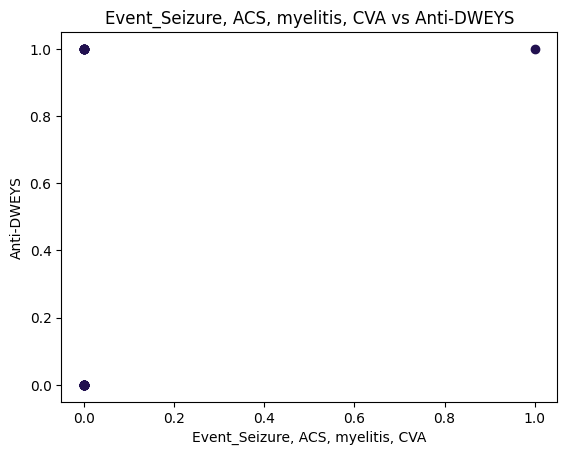

<Figure size 640x480 with 0 Axes>

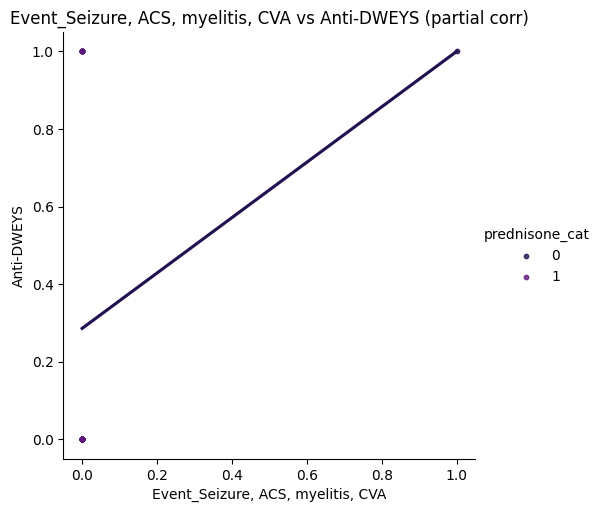

In [10]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP left volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[dw])
    print(f'{col} vs {dw}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=dw, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {dw} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {dw} are perfectly correlated'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dw])
print(f'{lesion_load} vs {dw}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dw, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dw} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[dw])
plt.xlabel(col)
plt.ylabel(dw)
plt.title(f'{col} vs {dw}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=dw, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {dw} (partial corr)')
plt.show()


In [11]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP left volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OCP left volume cm3: r = 0.10, p = 0.62
Event_CVA vs OCP left volume cm3 (partial corr): r = 0.14, p = 0.53
Event_Mood abnormalities (depressive) vs OCP left volume cm3: r = -0.38, p = 0.05
Event_Mood abnormalities (depressive) vs OCP left volume cm3 (partial corr): r = -0.32, p = 0.14
Event_Mood abnormalities (mixed) vs OCP left volume cm3: r = -0.33, p = 0.10
Event_Mood abnormalities (mixed) vs OCP left volume cm3 (partial corr): r = -0.16, p = 0.47
Event_Movement Disorder vs OCP left volume cm3: r = -0.15, p = 0.45
Event_Movement Disorder vs OCP left volume cm3 (partial corr): r = 0.06, p = 0.78
Event_Psychosis vs OCP left volume cm3: r = 0.22, p = 0.27
Event_Psychosis vs OCP left volume cm3 (partial corr): r = 0.41, p = 0.05
Event_Seizure vs OCP left volume cm3: r = 0.14, p = 0.50
Event_Seizure vs OCP left volume cm3 (partial corr): r = 0.07, p = 0.75
Event_Seizure, ACS, myelitis, CVA vs OCP left volume cm3: r = -0.25, p = 0.21
Event_Seizure, ACS, myelitis, CVA vs OCP 

In [13]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dw])
print(f'{lesion_load} vs {dw}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dw, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dw} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

OCP total volume cm3 vs Anti-DWEYS: r = -0.51, p = 0.01
OCP total volume cm3 vs Anti-DWEYS (partial corr): r = -0.36, p = 0.09


In [14]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'OCP total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs OCP total volume cm3: r = 0.13, p = 0.53
Event_CVA vs OCP total volume cm3 (partial corr): r = 0.12, p = 0.59
Event_Mood abnormalities (depressive) vs OCP total volume cm3: r = -0.37, p = 0.06
Event_Mood abnormalities (depressive) vs OCP total volume cm3 (partial corr): r = -0.19, p = 0.40
Event_Mood abnormalities (mixed) vs OCP total volume cm3: r = -0.30, p = 0.13
Event_Mood abnormalities (mixed) vs OCP total volume cm3 (partial corr): r = -0.20, p = 0.36
Event_Movement Disorder vs OCP total volume cm3: r = -0.23, p = 0.26
Event_Movement Disorder vs OCP total volume cm3 (partial corr): r = 0.01, p = 0.95
Event_Psychosis vs OCP total volume cm3: r = 0.22, p = 0.27
Event_Psychosis vs OCP total volume cm3 (partial corr): r = 0.42, p = 0.04
Event_Seizure vs OCP total volume cm3: r = 0.06, p = 0.76
Event_Seizure vs OCP total volume cm3 (partial corr): r = 0.04, p = 0.85
Event_Seizure, ACS, myelitis, CVA vs OCP total volume cm3: r = -0.33, p = 0.10
Event_Seizure, ACS, myelitis

In [15]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPrG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dw])
print(f'{lesion_load} vs {dw}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dw, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dw} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

MPrG right volume % vs Anti-DWEYS: r = 0.50, p = 0.01
MPrG right volume % vs Anti-DWEYS (partial corr): r = 0.46, p = 0.03


In [16]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'MPrG right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs MPrG right volume %: r = 0.13, p = 0.53
Event_CVA vs MPrG right volume % (partial corr): r = 0.10, p = 0.64
Event_Mood abnormalities (depressive) vs MPrG right volume %: r = 0.43, p = 0.03
Event_Mood abnormalities (depressive) vs MPrG right volume % (partial corr): r = 0.37, p = 0.08
Event_Mood abnormalities (mixed) vs MPrG right volume %: r = 0.03, p = 0.90
Event_Mood abnormalities (mixed) vs MPrG right volume % (partial corr): r = 0.04, p = 0.84
Event_Movement Disorder vs MPrG right volume %: r = -0.10, p = 0.62
Event_Movement Disorder vs MPrG right volume % (partial corr): r = -0.07, p = 0.76
Event_Psychosis vs MPrG right volume %: r = -0.42, p = 0.03
Event_Psychosis vs MPrG right volume % (partial corr): r = -0.63, p = 0.00
Event_Seizure vs MPrG right volume %: r = 0.11, p = 0.60
Event_Seizure vs MPrG right volume % (partial corr): r = -0.07, p = 0.74
Event_Seizure, ACS, myelitis, CVA vs MPrG right volume %: r = 0.30, p = 0.13
Event_Seizure, ACS, myelitis, CVA vs MPrG 

In [17]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SCA total volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dw])
print(f'{lesion_load} vs {dw}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dw, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dw} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

SCA total volume cm3 vs Anti-DWEYS: r = -0.46, p = 0.01
SCA total volume cm3 vs Anti-DWEYS (partial corr): r = -0.39, p = 0.06


In [50]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Cerebellar Vermal Lobules VIII-X volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dw])
print(f'{lesion_load} vs {dw}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dw, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dw} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

Cerebellar Vermal Lobules VIII-X volume cm3 vs Anti-DWEYS: r = -0.55, p = 0.00267
Cerebellar Vermal Lobules VIII-X volume cm3 vs Anti-DWEYS (partial corr): r = -0.40, p = 0.05745


In [49]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Cerebellar Vermal Lobules VIII-X volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Cerebellar Vermal Lobules VIII-X volume cm3: r = 0.00, p = 1.00000
Event_CVA vs Cerebellar Vermal Lobules VIII-X volume cm3 (partial corr): r = 0.09, p = 0.69552
Event_Mood abnormalities (depressive) vs Cerebellar Vermal Lobules VIII-X volume cm3: r = -0.56, p = 0.00223
Event_Mood abnormalities (depressive) vs Cerebellar Vermal Lobules VIII-X volume cm3 (partial corr): r = -0.44, p = 0.03543
Event_Mood abnormalities (mixed) vs Cerebellar Vermal Lobules VIII-X volume cm3: r = -0.18, p = 0.37918
Event_Mood abnormalities (mixed) vs Cerebellar Vermal Lobules VIII-X volume cm3 (partial corr): r = -0.11, p = 0.60394
Event_Movement Disorder vs Cerebellar Vermal Lobules VIII-X volume cm3: r = 0.05, p = 0.80302
Event_Movement Disorder vs Cerebellar Vermal Lobules VIII-X volume cm3 (partial corr): r = 0.27, p = 0.20794
Event_Psychosis vs Cerebellar Vermal Lobules VIII-X volume cm3: r = 0.15, p = 0.46974
Event_Psychosis vs Cerebellar Vermal Lobules VIII-X volume cm3 (partial corr): r

In [19]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SMC left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[dw])
print(f'{lesion_load} vs {dw}: r = {r_mtg:.2f}, p = {p_mtg:.2f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=dw, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {dw} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.2f}')

SMC left volume % vs Anti-DWEYS: r = 0.48, p = 0.01
SMC left volume % vs Anti-DWEYS (partial corr): r = 0.45, p = 0.03


In [20]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'SMC left volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
dw = 'Anti-DWEYS'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs SMC left volume %: r = 0.28, p = 0.16
Event_CVA vs SMC left volume % (partial corr): r = 0.19, p = 0.38
Event_Mood abnormalities (depressive) vs SMC left volume %: r = 0.50, p = 0.01
Event_Mood abnormalities (depressive) vs SMC left volume % (partial corr): r = 0.44, p = 0.04
Event_Mood abnormalities (mixed) vs SMC left volume %: r = -0.10, p = 0.62
Event_Mood abnormalities (mixed) vs SMC left volume % (partial corr): r = -0.14, p = 0.53
Event_Movement Disorder vs SMC left volume %: r = 0.30, p = 0.13
Event_Movement Disorder vs SMC left volume % (partial corr): r = 0.17, p = 0.44
Event_Psychosis vs SMC left volume %: r = -0.36, p = 0.06
Event_Psychosis vs SMC left volume % (partial corr): r = -0.49, p = 0.02
Event_Seizure vs SMC left volume %: r = -0.02, p = 0.94
Event_Seizure vs SMC left volume % (partial corr): r = -0.28, p = 0.20
Event_Seizure, ACS, myelitis, CVA vs SMC left volume %: r = 0.08, p = 0.71
Event_Seizure, ACS, myelitis, CVA vs SMC left volume % (partial cor

## aPL Syndrome

Event_CVA vs aPL syndrome: r = 0.47, p = 0.01
Event_CVA vs <module 'statsmodels.api' from '/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/statsmodels/api.py'> (partial corr): r = 0.58, p = 0.00
Event_Mood abnormalities (depressive) vs aPL syndrome: r = -0.20, p = 0.32
Event_Mood abnormalities (depressive) vs <module 'statsmodels.api' from '/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/statsmodels/api.py'> (partial corr): r = -0.29, p = 0.18
Event_Mood abnormalities (mixed) vs aPL syndrome: r = -0.08, p = 0.69
Event_Mood abnormalities (mixed) vs <module 'statsmodels.api' from '/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/statsmodels/api.py'> (partial corr): r = 0.02, p = 0.93
Event_Movement Disorder vs aPL syndrome: r = -0.08, p = 0.69
Event_Movement Disorder vs <module 'statsmodels.api' from '/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/statsmodels/api.py'> (

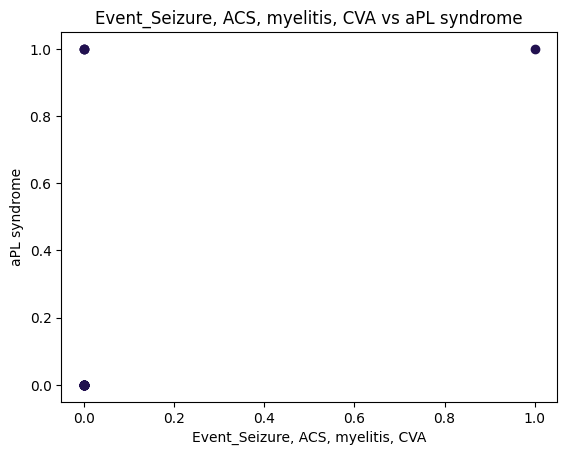

<Figure size 640x480 with 0 Axes>

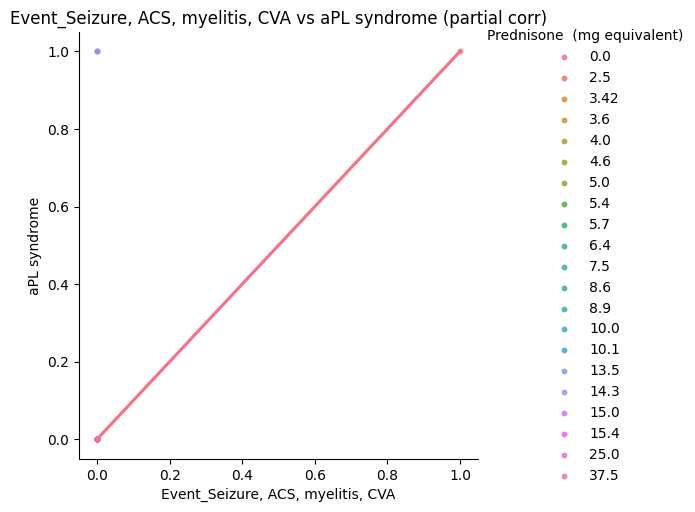

In [8]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
#df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Lateral Ventricle right volume %'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
aPL = 'aPL syndrome'

## Compute the correlations
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and C4
    r, p = spearmanr(df[col], df[aPL])
    print(f'{col} vs {aPL}: r = {r:.2f}, p = {p:.2f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=aPL, covar=[prednisone, sledai, age, sex])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {sm} (partial corr): r = {r_partial:.2f}, p = {p_partial:.2f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {aPL} are perfectly correlated'
    
# Compute the Pearson correlation 
r_mtg, p_mtg = spearmanr(df[lesion_load], df[aPL])
print(f'{lesion_load} vs {aPL}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=aPL, covar=[prednisone, np_sle, age, sex])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {aPL} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')


# Plot the scatter plot
plt.figure()
plt.scatter(df[col], df[aPL])
plt.xlabel(col)
plt.ylabel(aPL)
plt.title(f'{col} vs {aPL}')
plt.show()

# Plot the partial scatter plot
plt.figure()
sns.lmplot(data=df, x=col, y=aPL, hue=prednisone, ci=None, scatter_kws={"s": 10})
plt.title(f'{col} vs {aPL} (partial corr)')
plt.show()


In [10]:
from scipy.stats import spearmanr
import pingouin as pg

df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
aPL = 'aPL syndrome'
    
# Compute the Pearson correlation between MTG thickness and C4
r_mtg, p_mtg = spearmanr(df[lesion_load], df[aPL])
print(f'{lesion_load} vs {aPL}: r = {r_mtg:.2f}, p = {p_mtg:.5f}')

# Compute the partial correlation adjusting for prednisone and NP-SLE
partial_corr_mtg_results = pg.partial_corr(data=df, x=lesion_load, y=aPL, covar=[prednisone, sledai, age, sex, np_sle])
r_mtg_partial, p_mtg_partial = partial_corr_mtg_results['r'][0], partial_corr_mtg_results['p-val'][0]
print(f'{lesion_load} vs {aPL} (partial corr): r = {r_mtg_partial:.2f}, p = {p_mtg_partial:.5f}')

Abnormal Appearing White Matter volume cm3 vs aPL syndrome: r = 0.54, p = 0.00400
Abnormal Appearing White Matter volume cm3 vs aPL syndrome (partial corr): r = 0.55, p = 0.00835


In [12]:
from scipy.stats import spearmanr
import pingouin as pg

#df['SLEDAI_cat'] = np.where(df['SLEDAI-2k (at the time of NP event)'] > df['SLEDAI-2k (at the time of NP event)'].median(), 1, 0)
df['prednisone_cat'] = np.where(df['Prednisone  (mg equivalent)'] > df['Prednisone  (mg equivalent)'].median(), 1, 0)

# Define the variables
neurocog_cols = ['Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)', 'Event_Movement Disorder', 'Event_Psychosis','Event_Seizure','Event_Seizure, ACS, myelitis, CVA']
lesion_load = 'Abnormal Appearing White Matter volume cm3'
prednisone = 'Prednisone  (mg equivalent)'
np_sle = 'NP-SLE'
aPL = 'aPL syndrome'

## Compute the correlations with lesion_load
for col in neurocog_cols:
    # Compute the Pearson correlation between each neurocognitive domain and lesion_load
    r, p = spearmanr(df[col], df[lesion_load])
    print(f'{col} vs {lesion_load}: r = {r:.2f}, p = {p:.5f}')

    # Compute the partial correlation adjusting for prednisone and NP-SLE
    partial_corr_results = pg.partial_corr(data=df, x=col, y=lesion_load, covar=[prednisone, np_sle, age, sex, sledai])
    r_partial, p_partial = partial_corr_results['r'][0], partial_corr_results['p-val'][0]
    print(f'{col} vs {lesion_load} (partial corr): r = {r_partial:.2f}, p = {p_partial:.5f}')
    assert abs(r - r_partial) > 1e-10, f'{col} and {lesion_load} are perfectly correlated'

Event_CVA vs Abnormal Appearing White Matter volume cm3: r = 0.28, p = 0.16193
Event_CVA vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.44, p = 0.04167
Event_Mood abnormalities (depressive) vs Abnormal Appearing White Matter volume cm3: r = -0.20, p = 0.32753
Event_Mood abnormalities (depressive) vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.44, p = 0.04095
Event_Mood abnormalities (mixed) vs Abnormal Appearing White Matter volume cm3: r = -0.33, p = 0.09559
Event_Mood abnormalities (mixed) vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.06, p = 0.78440
Event_Movement Disorder vs Abnormal Appearing White Matter volume cm3: r = 0.08, p = 0.70806
Event_Movement Disorder vs Abnormal Appearing White Matter volume cm3 (partial corr): r = 0.24, p = 0.27826
Event_Psychosis vs Abnormal Appearing White Matter volume cm3: r = 0.13, p = 0.52756
Event_Psychosis vs Abnormal Appearing White Matter volume cm3 (partial corr): r = -0.18, 

## Neurocognitive

In [15]:
import pingouin as pg
import pandas as pd

# Define the columns of interest
neurocog_cols = [
    'Event_CVA', 'Event_Mood abnormalities (depressive)', 'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder', 'Event_Psychosis', 'Event_Seizure', 'Event_Seizure, ACS, myelitis, CVA'
]

brain_region_cols = list(df.columns[44:937])  # Assuming these are the correct column indices

# Define covariates
prednisone = 'Prednisone  (mg equivalent)'
age = 'Age'
sex = 'Gender'
sledai = 'SLEDAI-2k (at the time of NP event)'

# Initialize a dictionary to store correlations and p-values for each NP event
event_correlations = {event: {'Positively_Correlated': [], 'Negatively_Correlated': []} for event in neurocog_cols}

# Perform partial correlation analysis for each neurocognitive column and brain region column for each NP event
for neurocog_col in neurocog_cols:
    for brain_region_col in brain_region_cols:
        # Perform partial correlation adjusting for prednisone, age, and sex
        partial_corr_results = pg.partial_corr(data=df, x=neurocog_col, y=brain_region_col, covar=[prednisone, age, sex, sledai])

        # Extract the partial correlation coefficient and p-value
        partial_corr_coeff = partial_corr_results['r'][0]
        p_value = partial_corr_results['p-val'][0]

        # Determine if the correlation is positive or negative
        correlation_type = 'Positively_Correlated' if partial_corr_coeff > 0 else 'Negatively_Correlated'

        # Append the MRI variable and its correlation coefficient to the corresponding list
        event_correlations[neurocog_col][correlation_type].append((brain_region_col, partial_corr_coeff, p_value))

# Sort and select the top 5 positively and negatively correlated MRI features for each NP event
top_correlations = {}
for event, correlations in event_correlations.items():
    correlations['Positively_Correlated'].sort(key=lambda x: abs(x[1]), reverse=True)
    correlations['Negatively_Correlated'].sort(key=lambda x: abs(x[1]), reverse=True)
    top_correlations[event] = {
        'Positively_Correlated': correlations['Positively_Correlated'][:5],
        'Negatively_Correlated': correlations['Negatively_Correlated'][:5]
    }

# Print the top 5 positively and negatively correlated MRI features for each NP event
for event, correlations in top_correlations.items():
    print(f"NP Event: {event}")
    print("Top 5 Positively Correlated MRI Features:")
    for feature, coeff, p_value in correlations['Positively_Correlated']:
        print(f"Feature: {feature}, Correlation: {coeff}, P-Value: {p_value}")
    
    print("Top 5 Negatively Correlated MRI Features:")
    for feature, coeff, p_value in correlations['Negatively_Correlated']:
        print(f"Feature: {feature}, Correlation: {coeff}, P-Value: {p_value}")
    print("\n")


NP Event: Event_CVA
Top 5 Positively Correlated MRI Features:
Feature: SCA thickness asymmetry, Correlation: 0.7106735654351568, P-Value: 0.00014449234295294672
Feature: TMP thickness asymmetry, Correlation: 0.6948088448720464, P-Value: 0.00023395962594641853
Feature: TrIFG thickness asymmetry, Correlation: 0.5568806991941648, P-Value: 0.005778085768892679
Feature: Insular thickness asymmetry, Correlation: 0.5477374783451666, P-Value: 0.0068200058702000245
Feature: MCgG right volume cm3, Correlation: 0.5414809461544017, P-Value: 0.007619398900986424
Top 5 Negatively Correlated MRI Features:
Feature: GRe right thickness mm, Correlation: -0.693585231862135, P-Value: 0.0002425180448466755
Feature: GRe right thickness norm., Correlation: -0.6546318347162036, P-Value: 0.0007006641337651879
Feature: Caudate volume asymmetry, Correlation: -0.6256166504396818, P-Value: 0.0014095164050892388
Feature: GRe total thickness mm, Correlation: -0.6224284100965541, P-Value: 0.0015157227927880062
Featur